<a href="https://colab.research.google.com/github/Adammalik28/machine_learning/blob/main/uas%20praktek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# uas praktek


SOAL 1: LOAD & EKSPLORASI DATA
1. Dimensi Data
   - Jumlah Sampel : 569
   - Jumlah Fitur  : 30

2. Sampel Nama Fitur (5 pertama):
   ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']

3. Distribusi Kelas Target:
   - Malignant: 212 sampel (37.3%)
   - Benign: 357 sampel (62.7%)


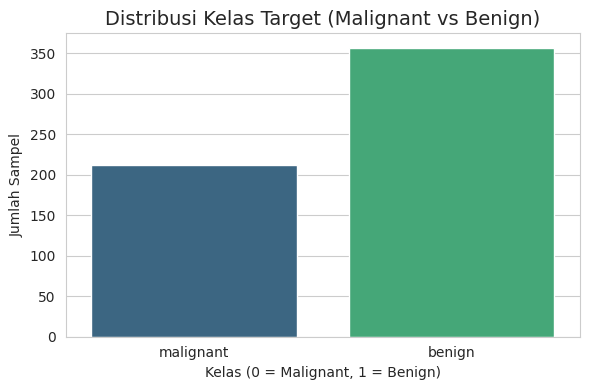


SOAL 2: PREPROCESSING
Data Split Selesai:
   - Training set: 398 sampel
   - Testing set : 171 sampel

Feature Scaling (StandardScaler) selesai.
   - Mean data train (scaled) : -0.00
   - Std data train (scaled)  : 1.00

SOAL 3: MODEL KNN (K=5)
Akurasi Model: 0.9591 (95.91%)

Laporan Klasifikasi Lengkap:
------------------------------------------------------------
              precision    recall  f1-score   support

   malignant       1.00      0.89      0.94        64
      benign       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

------------------------------------------------------------


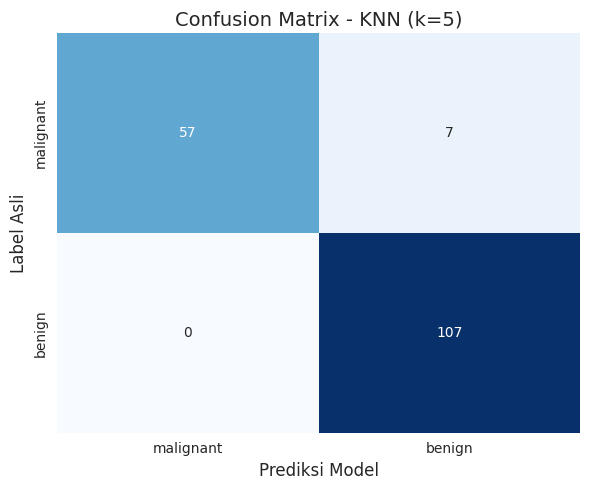

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-Learn modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Konfigurasi Visualisasi
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

def load_and_explore_data():
    """
    Soal 1: Load dataset dan eksplorasi dasar.
    """
    print("\n" + "="*40)
    print("SOAL 1: LOAD & EKSPLORASI DATA")
    print("="*40)

    # a. Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names

    # b. Tampilkan Informasi
    print(f"1. Dimensi Data")
    print(f"   - Jumlah Sampel : {X.shape[0]}")
    print(f"   - Jumlah Fitur  : {X.shape[1]}")

    print(f"\n2. Sampel Nama Fitur (5 pertama):")
    print(f"   {feature_names[:5]}")

    unique, counts = np.unique(y, return_counts=True)
    distribusi = dict(zip(target_names, counts))
    print(f"\n3. Distribusi Kelas Target:")
    for nama, jumlah in distribusi.items():
        print(f"   - {nama.capitalize()}: {jumlah} sampel ({jumlah/len(y):.1%})")

    # Visualisasi Distribusi Target
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y, hue=y, palette="viridis", legend=False)
    plt.title("Distribusi Kelas Target (Malignant vs Benign)", fontsize=14)
    plt.xlabel("Kelas (0 = Malignant, 1 = Benign)")
    plt.ylabel("Jumlah Sampel")
    plt.xticks(ticks=[0, 1], labels=target_names)
    plt.tight_layout()
    plt.show()

    return X, y, target_names

def preprocess_data(X, y):
    """
    Soal 2: Splitting dan Scaling.
    """
    print("\n" + "="*40)
    print("SOAL 2: PREPROCESSING")
    print("="*40)

    # a. Split Data (70:30)
    # Best Practice: Gunakan 'stratify=y' agar rasio kelas di train & test tetap sama
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"Data Split Selesai:")
    print(f"   - Training set: {X_train.shape[0]} sampel")
    print(f"   - Testing set : {X_test.shape[0]} sampel")

    # b. Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nFeature Scaling (StandardScaler) selesai.")
    print(f"   - Mean data train (scaled) : {np.mean(X_train_scaled):.2f}")
    print(f"   - Std data train (scaled)  : {np.std(X_train_scaled):.2f}")

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_evaluate_knn(X_train, X_test, y_train, y_test, target_names, k=5):
    """
    Soal 3: Training Model dan Evaluasi.
    """
    print("\n" + "="*40)
    print(f"SOAL 3: MODEL KNN (K={k})")
    print("="*40)

    # a. Implementasi Model
    knn = KNeighborsClassifier(n_neighbors=k)

    # b. Training
    knn.fit(X_train, y_train)

    # Prediksi
    y_pred = knn.predict(X_test)

    # c. Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi Model: {acc:.4f} ({acc*100:.2f}%)")
    print("\nLaporan Klasifikasi Lengkap:")
    print("-" * 60)
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("-" * 60)

    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names,
                yticklabels=target_names, cbar=False)
    plt.title(f'Confusion Matrix - KNN (k={k})', fontsize=14)
    plt.xlabel('Prediksi Model', fontsize=12)
    plt.ylabel('Label Asli', fontsize=12)
    plt.tight_layout()
    plt.show()

# === MAIN EXECUTION ===
if __name__ == "__main__":
    # Jalankan tahapan satu per satu
    X, y, class_names = load_and_explore_data()
    X_train_s, X_test_s, y_train, y_test = preprocess_data(X, y)
    train_evaluate_knn(X_train_s, X_test_s, y_train, y_test, class_names, k=5)